In [1]:
# EDA libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport 

# Mounting the data dir 
from pathlib import Path
data_dir_interim = Path('.').resolve().parent / "data" / "interim"

In [2]:
# Load interim data 
df = pd.read_csv(data_dir_interim / "cleaned_health_insurance_us_v1.csv")
print(f'Shape of the data: {df.shape}')
print(f'Preview of the data:\n {df.head()}')

Shape of the data: (1337, 7)
Preview of the data:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# Basic statistics
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


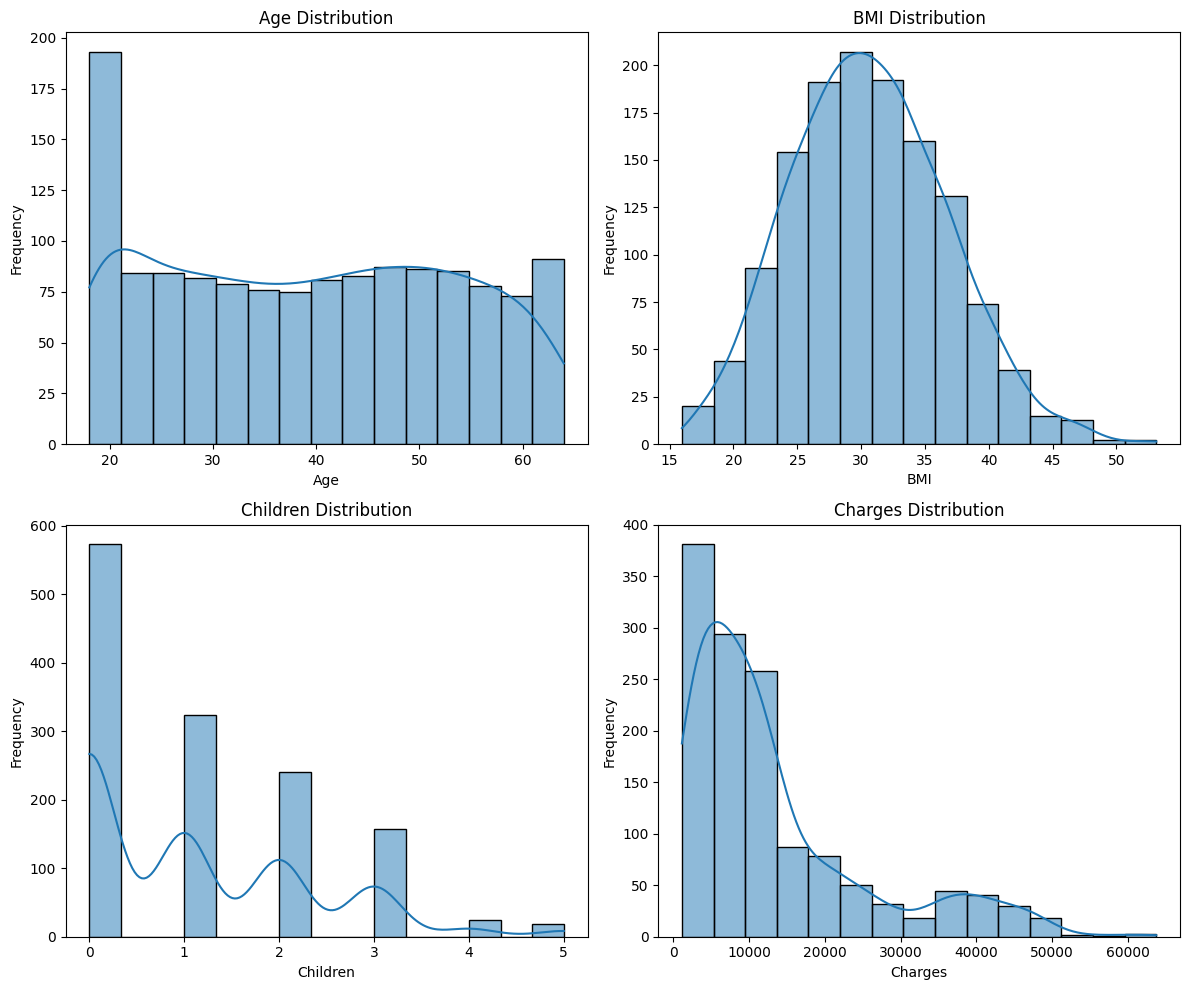

In [4]:
# Visual check for distributions - use subplots for ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['age'], bins=15, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df['bmi'], bins=15, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df['children'], bins=15, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')
axes[1, 0].set_xlabel('Children')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df['charges'], bins=15, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution')
axes[1, 1].set_xlabel('Charges')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Categorical features: ['sex', 'smoker', 'region']


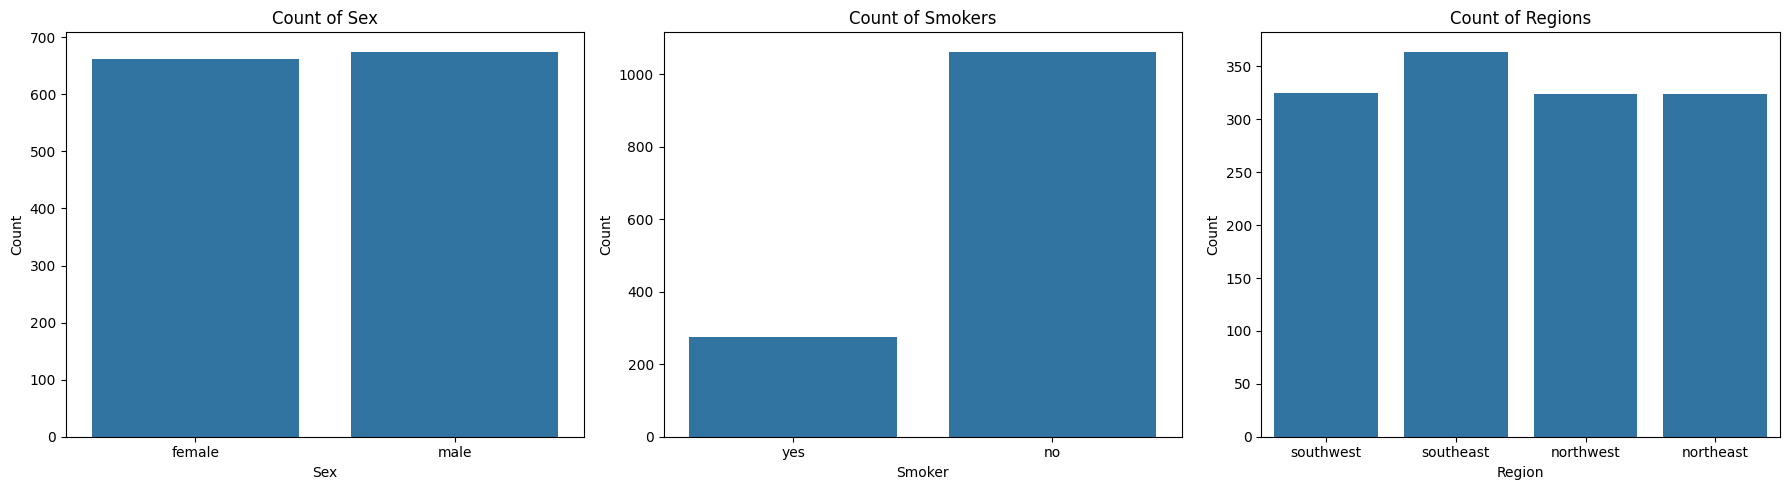

In [5]:
# Look at cardinal features 
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical features: {categorical_features}')

df[categorical_features].nunique()

# visual check for categorical features - use subplots 

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x='sex', ax=axes[0])
axes[0].set_title('Count of Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='smoker', ax=axes[1])
axes[1].set_title('Count of Smokers')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Count')

sns.countplot(data=df, x='region', ax=axes[2])
axes[2].set_title('Count of Regions')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

- Cardinal features - 'region' has the highest cardinality with 4 unique values, while 'sex' and 'smoker' have 2 unique values each, so fairly small. 
- Sample balance - 'Sex' is balanced, while 'Region' is slightly imbalanced with 'Southeast' having more samples than rest of the regions which are roughly equal. Smoker is highly imbalanced with only a small fraction of smokers in the dataset.


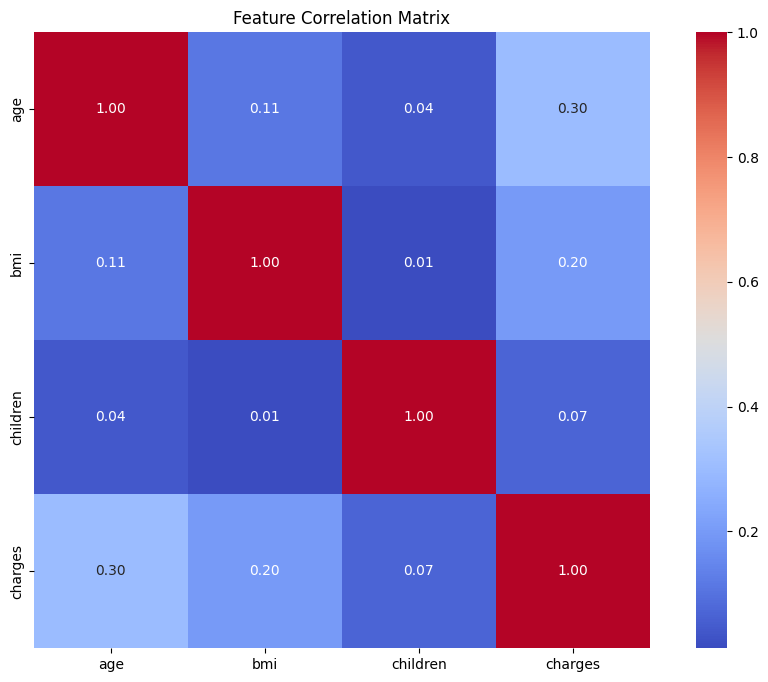

In [6]:
# Checking feature (linear) correlations

correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

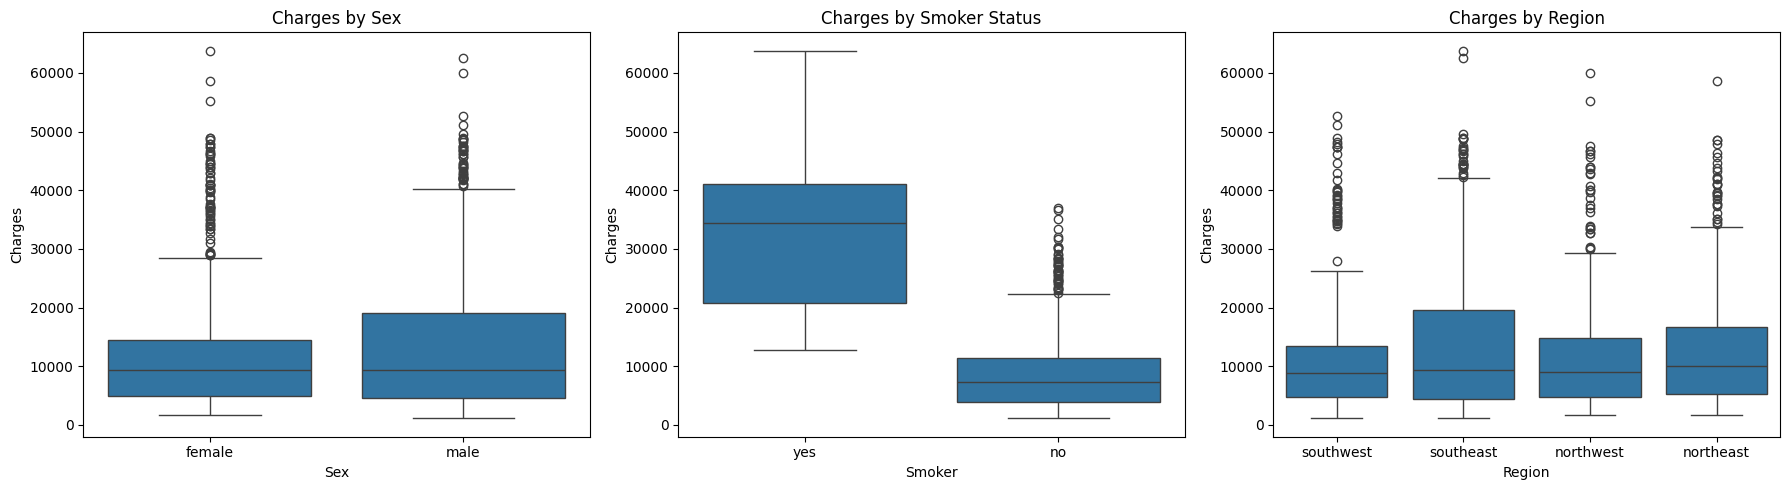

In [7]:
# Checking categorical feature correlations with charges 

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='sex', y='charges', ax=axes[0])
axes[0].set_title('Charges by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Charges')

sns.boxplot(data=df, x='smoker', y='charges', ax=axes[1])
axes[1].set_title('Charges by Smoker Status')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Charges')

sns.boxplot(data=df, x='region', y='charges', ax=axes[2])
axes[2].set_title('Charges by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Charges')

plt.tight_layout()
plt.show()


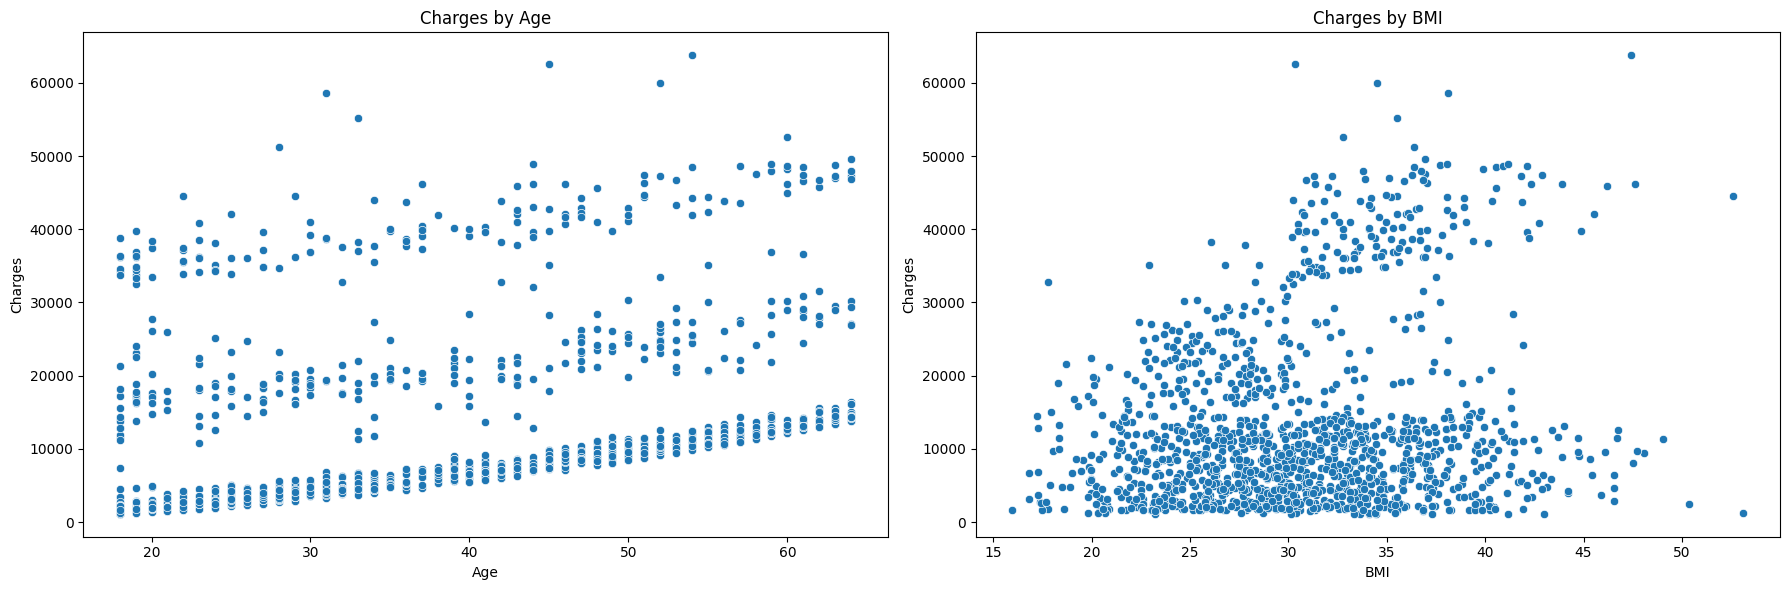

In [8]:
# Scatter plot to observe how charges vary with age and bmi via subplots 

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data=df, x='age', y='charges', ax=axes[0])
axes[0].set_title('Charges by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges')

sns.scatterplot(data=df, x='bmi', y='charges', ax=axes[1])
axes[1].set_title('Charges by BMI')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')

plt.tight_layout()
plt.show()


Not straightforward relationship (linear) between charges and age/BMI. 

In [9]:
profile = ProfileReport(df, title="Health Insurance Data Profiling Report", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 109552.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# numeric 
df.select_dtypes(include=['number']).corr(method='spearman')

,age,bmi,children,charges
age,1.000000,0.107897,0.055813,0.533523
bmi,0.107897,1.000000,0.015643,0.119585
children,0.055813,0.015643,1.000000,0.132200
charges,0.533523,0.119585,0.132200,1.000000


In [11]:
# categorial - first turn into crosstab and then do cramer
crosstab = pd.crosstab(df['cat_col1'], df['cat_col2'])
cramer_v = cramers_v(crosstab)

KeyError: 'cat_col1'